# Introduction
<img src="https://cdn.dribbble.com/users/1890021/screenshots/8576649/media/fffdfabcea9ffe954570a25aa9423b08.gif">
Food delivery has become one of the prominent services adopted by the restaurant industry. The metropolitan cities are getting busier and hooked up to work so the people prefer ordering food online as they seldom find time to buy groceries and cook food. Start-up’s such as Swiggy, Zomato, Dunzo etc. are huge choice of medium for delivering food at their door steps. These start-ups become a medium to deliver food and restaurants becomes the place to prepare food demanded by the consumers. The food delivery is highly prevailing in the metropolitan cities where delivery captains can be seen at a higher rate. These captains receive order request from the buyer and when they accept it the order process begins and end with the food being delivered to the customer. Customers provide rating once the order completed and there are many satisfaction factors that depend on ratings. Customer provide rating post-delivery for the delivery service and another rating post having the meal for the food quality. Customer orders from the same restaurant again if the food quality is good and also from the same service provider if the delivery service is satisfying and thus creating a demand of that restaurant food and delivery service.

## Context of dataset
This dataset was collected from the **residents of Bangalore** which studies on factors which are contributing to the demand of food delivery in the city.


## Objectives of kernel
1. Pivot table analysis-Pandas
2. Exploratory data analysis- Univariate, Bivariate and Multivariate
3. Geospatial Analysis
4. Text Analysis


## Import Libraries
Let's import all necessary libraries for the analysis and along with it let's bring down our dataset

In [4]:
#Basic libraries
import pandas as pd
pd.set_option('max_columns', 100) #Display all columns
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot

#Geospatial Analysis Libraries
import geopandas as gpd
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from textblob import TextBlob


#Miscellaneous libraries
from collections import defaultdict
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

### Understanding the data 
Now let's start by peeking into the data using pandas inbuilt functions

In [5]:
#Reading the data
delivery=pd.read_csv('../input/online-food-delivery-preferencesbangalore-region/onlinedeliverydata.csv')

#Printing the information of dataset
print ("The shape of the  data is (row, column):"+ str(delivery.shape))
print(delivery.info())

The shape of the  data is (row, column):(388, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 n

## Content of dataset
The dataset has nearly 55 variables based on the following titles

1. Demographics of consumers
2. Overall/general purchase decision
3. Time of delivery influencing the purchase decision
4. Rating of Restaurant influencing the purchase decision

For more information on each columns check out the description provided below head column title

## Datapeek- head and describe !

Here we use simple functions into the dataset in a dataframe view to see the numbers. 

In [6]:
delivery.head()

Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

          Medium (P1)   Medium (P2)   Meal(P1) Meal(P2)  \
0  Food delivery apps   Web browser  Breakfast    Lunch   
1  Food delivery apps   Web browser     Snacks   Dinner   
2  Food delivery apps   Direct call      Lunch   Snacks   
3  Food delivery apps       Walk-in     Snacks   Dinner   
4             Walk-in   Direct call      Lunch   Dinner   

                           Perference(P1)  \
0          Non Veg foods (Lunch / Dinner)   
1          Non Veg foods (Lunch / Dinner)   
2          Non Veg foods (Lunch / Dinner)   
3  Veg foods (Breakfast / Lunch / Dinner)   
4          Non Veg foods (Lunch / Dinner)   

                            Perference(P2) Ease and convenient  \
0                    Bakery items (snacks)             Neutral   
1   Veg foods (Breakfast / Lunch / Dinner)      Strongly agree   
2                  Ice cream / Cool drinks      Strongly agree   
3                    Bakery items (snacks)               Agree   
4   Veg foods (Breakfast / Lunch / Dinner)               Agree   

      Time saving More restaurant choices Easy Payment option  \
0         Neutral                 Neutral             Neutral   
1  Strongly agree          Strongly agree      Strongly agree   
2  Strongly agree          Strongly agree             Neutral   
3           Agree          Strongly agree               Agree   
4           Agree                   Agree               Agree   

  More Offers and Discount Good Food quality Good Tracking system  \
0                  Neutral           Neutral              Neutral   
1           Strongly agree           Neutral                Agree   
2                  Neutral          Disagree              Neutral   
3           Strongly agree             Agree                Agree   
4                    Agree           Neutral              Neutral   

     Self Cooking  Health Concern   Late Delivery    Poor Hygiene  \
0         Neutral         Neutral         Neutral         Neutral   
1  Strongly agree  Strongly agree           Agree  Strongly agree   
2        Disagree         Neutral         Neutral           Agree   
3           Agree  Strongly agree         Neutral           Agree   
4           Agree  Strongly agree  Strongly agree           Agree   

  Bad past experience  Unavailability    Unaffordable Long delivery time  \
0             Neutral         Neutral         Neutral              Agree   
1      Strongly agree  Strongly agree  Strongly agree     Strongly agree   
2               Agree           Agree           Agree              Agree   
3            Disagree        Disagree         Neutral              Agree   
4      Strongly agree           Agree        Disagree     Strongly agree   

  Delay of delivery person getting assigned  \
0                                     Agree   
1                            Strongly agree   
2                                     Agree   
3                                     Agree   
4                            Strongly agree   

  Delay of delivery person picking up food Wrong order delivered  \
0                                    Agree                 Agree   
1                           Strongly agree        Strongly agree 

**Insights**
* We can understand that there are more categorical variables and very less continuous variables
* There is also longitude and latitude variable which can help us for geospatial analysis
* Most of the variables has likert scale classes inside the variable , it needs to be encoded

In [7]:
delivery.describe()

Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000

**Insights:**
* We have 388 respondents(records) in our dataset
* Age of the respondents vary between 18-33 with an average of 25
* Family size of respondents vary between 1-6 with an average of 3
* Lat, Long and Pincode shouldn't be considered for the numerical variable as they don't provide much values from such measures.

# Pivot Table analysis-Pandas
Now we use pivot_table function from pandas to crunch the numbers and check if there are any relationship between variables exists.

## Demographic analysis 1

In [8]:
#Pivot table
delivery_pivot1=pd.pivot_table(delivery,index=["Gender","Marital Status"],
                               values=['Age','Family size'],
                               aggfunc=[np.mean,len], margins=True)

#Adding color gradient 
cm = sns.light_palette("green", as_cmap=True)
delivery_pivot1.style.background_gradient(cmap=cm)

**Insights:**
* Average age of female, male and single is around 23 and 27,28 for married female and male respectively
* Average family size is 4 for a female respondent and 3 for male.
* There are more male respondents(bachelor/married) than in the case of female

## Demographic analysis 2

In [9]:
#Pivot table
delivery_pivot2=pd.pivot_table(delivery,index=["Educational Qualifications","Occupation"],
                               values=['Age','Family size'],
                               aggfunc=[np.mean,len,np.std])

#Adding bar for numbers
delivery_pivot2.style.bar()

**Insights:**
* Female respondents who has only till school education or uneducated are mostly house wives on an average and they aren't much young
* Also we can find that most of them are self employeed when they are uneducated
* Graduates and Phd's are most employeed and most of graduates and Phd's are still students
* We have higher deviation incase of school educated as the uncertainities are high about their career. Also Phd's who are employed also have higher deviation.

## Demographic analysis 3

In [10]:
#Pivot table
delivery_pivot3=pd.pivot_table(delivery,index=["Occupation","Monthly Income"],
                               values=['Age','Family size'],
                               aggfunc=[np.mean,len,np.std])

#Adding style
delivery_pivot3.style\
    .format('{:.2f}')\
    .bar(align='mid',color=['lightgreen'])\
    .set_properties(padding='5px',border='3px solid white',width='200px')

**Insights:**
* As the age increases the wage also increase along with the family size.
* Employee who received below Rs.10000 have higher deviation in age and family size
* There are nearly 178 students who has no income responded to this data
* The next highest responses were from employees who's salary is between Rs.25000-Rs50000 or can we say campus hired graduates who are in their first year of work ?

## Time factor analysis 1

In [11]:
#Pivot table
delivery_pivot4=pd.pivot_table(delivery,index=["Order Time","Maximum wait time"],
                               values=['Age','Family size'],columns=['Influence of time'],
                               aggfunc={'Influence of time':len},
                               fill_value=0)

#Adding color gradient
cm = sns.light_palette("blue", as_cmap=True)
delivery_pivot4.style.background_gradient(cmap=cm)

**Insights:**
* There are no influence in time of delivery when they can wait for 60 or more than 60 minutes for an order
* There is an high influence of time of delivery where the buyer can wait only for 30-45 mins.
* There aren't much purchasers who buys during weekdays only 
* Even during waiting purchasers can wait a max of 40 mins.

## Time factor analysis 2

In [12]:
#Pivot table
delivery_pivot4=pd.pivot_table(delivery,index=["Medium (P1)","Perference(P1)"],
                               columns=['Influence of time'],
                               aggfunc={'Influence of time':len},
                               fill_value=0)
#Adding color gradient
delivery_pivot4.style\
    .format('{:.2f}')\
    .bar(align='mid',color=['lightblue'])\
    .set_properties(padding='5px',border='3px solid white',width='200px')

**Insights:**
* Nearly 224 people who order Nonveg on apps are influenced by time . Also there are more nonveg food preference than veg food preference on apps
* There isn't much data for other types of medium and influence in time of delivery

# Exploratory Data Analysis

## Univariate Analysis
Here we take each variable and analyse one by one through seaborn and matplotlib plots

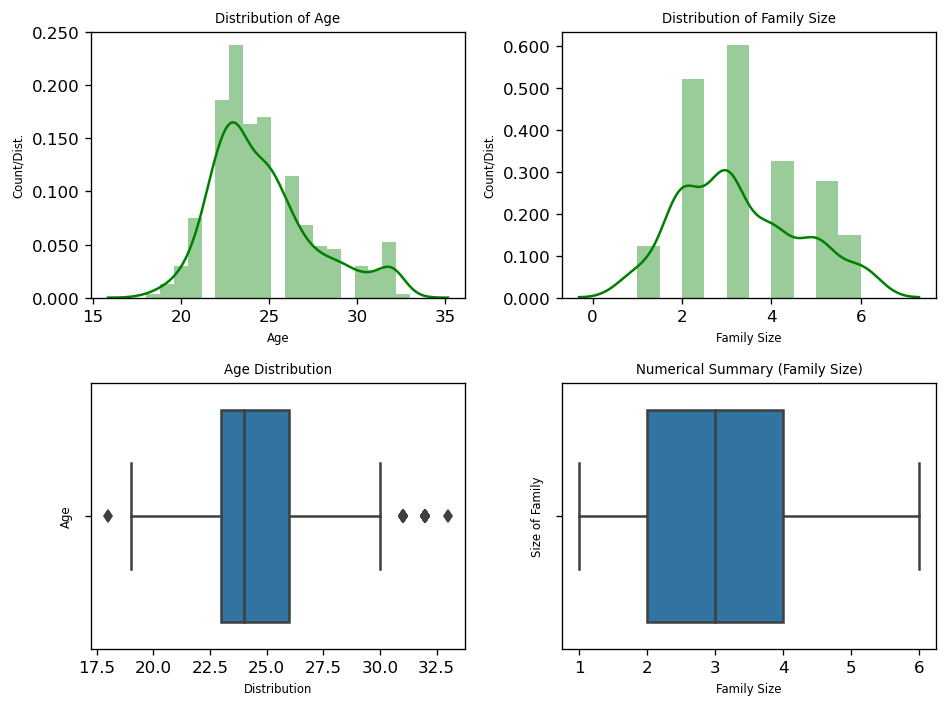

In [13]:
#Setting up the frame 
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))

#Distribution of age with displot
plot00=sns.distplot(delivery['Age'],ax=axes[0][0],color='green')
axes[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0][0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Age',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

#Distribution of Familysize with displot
plot01=sns.distplot(delivery['Family size'],ax=axes[0][1],color='green')
axes[0][1].set_title('Distribution of Family Size',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Family Size',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.tight_layout()

#Age-Boxplot
plot10=sns.boxplot(delivery['Age'],ax=axes[1][0])
axes[1][0].set_title('Age Distribution',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Distribution',fontdict={'fontsize':7})
axes[1][0].set_ylabel(r'Age',fontdict={'fontsize':7})
plt.tight_layout()

#FamilySize-Boxplot
plot11=sns.boxplot(delivery['Family size'],ax=axes[1][1])
axes[1][1].set_title(r'Numerical Summary (Family Size)',fontdict={'fontsize':8})
axes[1][1].set_ylabel(r'Size of Family',fontdict={'fontsize':7})
axes[1][1].set_xlabel('Family Size',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

**Insights:**
* Age and Family Size are normally distributed
* Age average is between 23-25 and the Family Size average is around 3
* There are some outliers incase of Age 

## Demographic Analysis

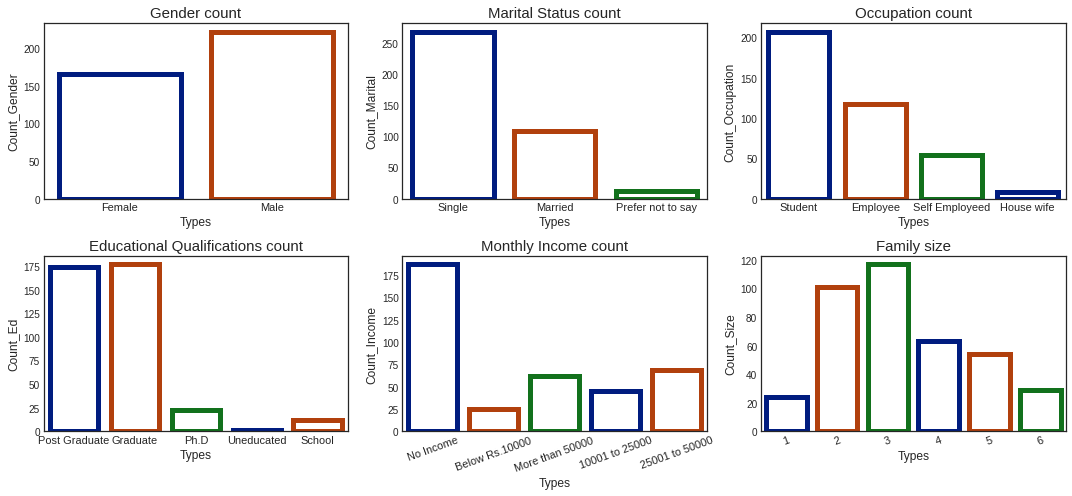

In [14]:
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Gender Countplot
plt.subplot(2,3,1)
ax = sns.countplot(x="Gender", data=delivery,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Gender count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Gender', fontsize = 12)
plt.tight_layout()

#Marital Status Countplot
plt.subplot(2,3,2)
ax = sns.countplot(x="Marital Status", data=delivery,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Marital Status count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Marital', fontsize = 12)
plt.tight_layout()

#Occupation Countplot
plt.subplot(2,3,3)
ax = sns.countplot(x="Occupation", data=delivery,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Occupation count',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count_Occupation', fontsize = 12)
plt.tight_layout()

#Education Countplot
plt.subplot(2,3,4)
ax = sns.countplot(x="Educational Qualifications", data=delivery,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Educational Qualifications count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Ed', fontsize = 12)
plt.tight_layout()

#Income Countplot
plt.subplot(2,3,5)
ax = sns.countplot(x="Monthly Income", data=delivery,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=20)
ax.set_title('Monthly Income count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Income', fontsize = 12)
plt.tight_layout()

#Family Size Countplot
plt.subplot(2,3,6)
ax = sns.countplot(x="Family size", data=delivery,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=20)
ax.set_title('Family size',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Size', fontsize = 12)
plt.tight_layout()

**Insights:**
* Normal distribution exists for family distribution where most of the family size (number of people staying with you) recorded were in the 3 people followed by 2. We can make an assumption that these respondents are mostly bachelors staying in hostel or PG and generally they are less likely to cook food in their room. 
* It can also be seen that nearly 57% of the respondents were male and 43%of the respondents were male and the data is almost balanced here. 
* The education qualification of respondents where highly from the young graduates (177) followed by post graduates (174) and it also covers Ph.D. Scholars, School children and Uneducated people.
* Most of the respondents comes under the No income bracket which supports the age variable as most of them are students and they don’t have regular income. The next highest income bracket is between Rs 25001 to 50000 which is a nominal salary for a fresher in corporate industry. Considering the occupation, the data has more student respondent which supports the previous analysis and it is followed by employee respondents. The data also covers respondents who are self-employed and home makers. Most of the respondents are bachelors who are students and there are significantly lesser number from married respondents.

## Consumer preferences

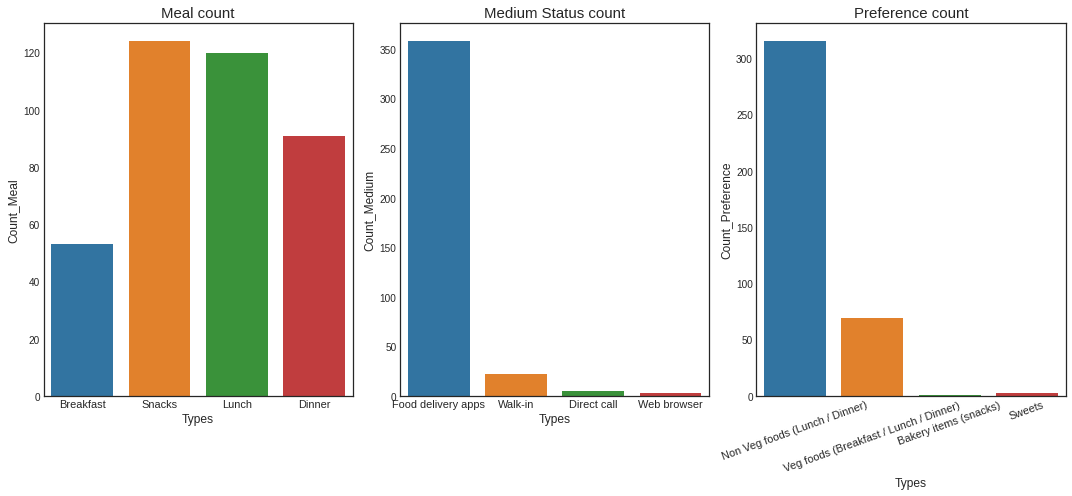

In [15]:
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Meal Countplot
plt.subplot(1,3,1)
ax = sns.countplot(x="Meal(P1)", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Meal count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Meal', fontsize = 12)
plt.tight_layout()

#Medium Countplot
plt.subplot(1,3,2)
ax = sns.countplot(x="Medium (P1)", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Medium Status count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Medium', fontsize = 12)
plt.tight_layout()

#Preference Countplot
plt.subplot(1,3,3)
ax = sns.countplot(x="Perference(P1)", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=20)
ax.set_title('Preference count',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count_Preference', fontsize = 12)
plt.tight_layout()

**Insights:**

The data for consumer preferences on which meal of the day, type of meal and medium to purchase food can be seen. Most of the preferences belongs to food delivery applications when it comes to medium of purchase followed by Walking and very few numbers for direct call and web browser and generally people prefer ordering food for lunch and snack items followed by dinner and lowest is for ordering breakfast. Nonveg is the most preferred type of meal followed by veg food and minimum numbers on sweets and bakery items.

## Purchase Demand

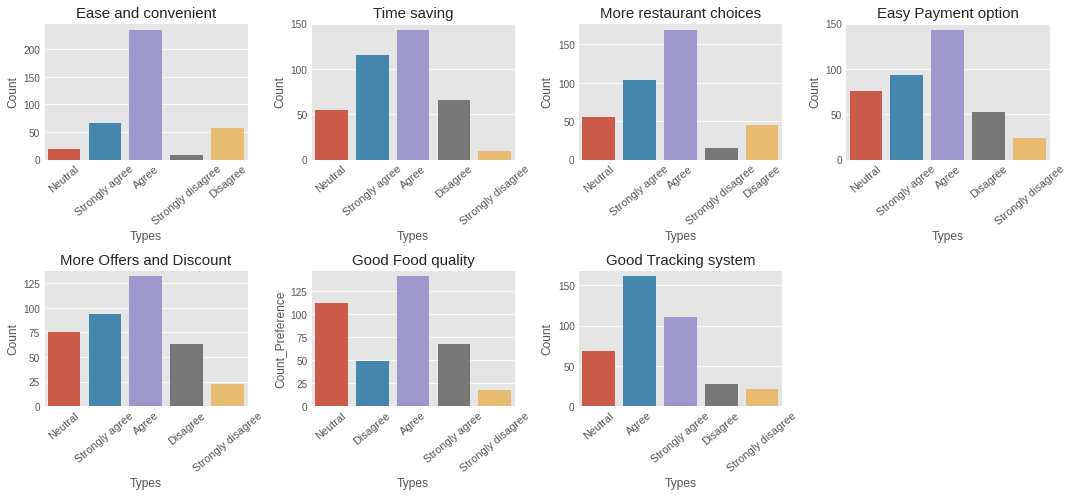

In [16]:
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('ggplot')

#Ease and convenient Countplot
plt.subplot(2,4,1)
ax = sns.countplot(x="Ease and convenient", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Ease and convenient',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Time Countplot
plt.subplot(2,4,2)
ax = sns.countplot(x="Time saving", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Time saving',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Restaurant Countplot
plt.subplot(2,4,3)
ax = sns.countplot(x="More restaurant choices", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('More restaurant choices',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Payment Countplot
plt.subplot(2,4,4)
ax = sns.countplot(x="Easy Payment option", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Easy Payment option',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Offers Countplot
plt.subplot(2,4,5)
ax = sns.countplot(x="More Offers and Discount", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('More Offers and Discount',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Preference Countplot
plt.subplot(2,4,6)
ax = sns.countplot(x="Good Food quality", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Food quality',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count_Preference', fontsize = 12)
plt.tight_layout()

#Tracking Countplot
plt.subplot(2,4,7)
ax = sns.countplot(x="Good Tracking system", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Tracking system',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

**Insights:**

It can be seen demand factors which pulls the consumer to purchase an order from application. We can see that ease and convenient while using an app for ordering are agreed much for influencing them to make an order. Also, the time saving factor has most response as nearly 258 respondents agree that using application to order is time saving. Respondents agree that they also order because of the restaurant choices provided in the application. Easy Payment also makes a significant contribution as 143 respondents agree that they consider this factor for the order demand.Majority of the respondents agree that quantity of food they get also plays a role in their order but there are nearly 112 respondents who are neutral in that case and people also point out that the tracking system is feasible and if it is really well designed that would make them to purchase via food delivery apps.

## Restriction in order demand

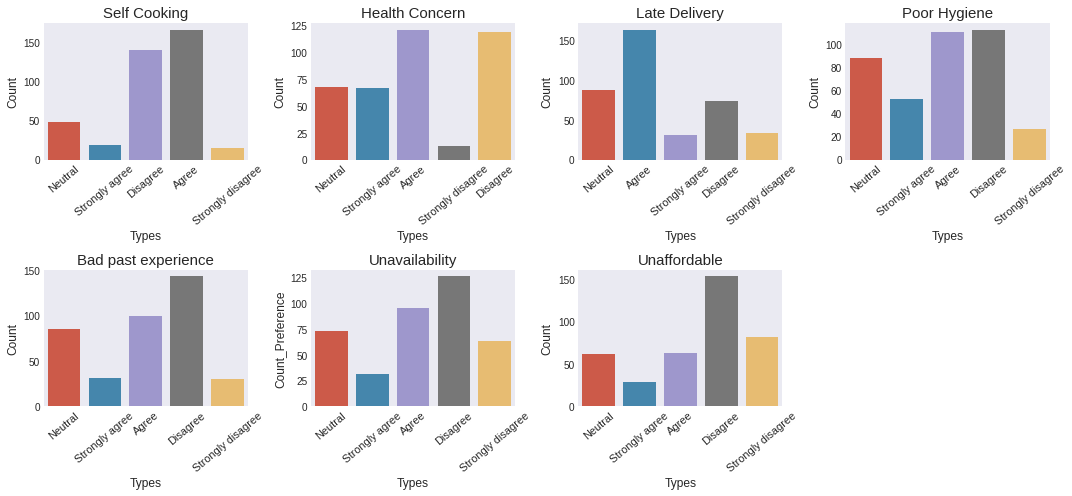

In [17]:
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-dark')

#Self cooking Countplot
plt.subplot(2,4,1)
ax = sns.countplot(x="Self Cooking", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Self Cooking',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Health Countplot
plt.subplot(2,4,2)
ax = sns.countplot(x="Health Concern", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Health Concern',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Late delivery Countplot
plt.subplot(2,4,3)
ax = sns.countplot(x="Late Delivery", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Late Delivery',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Hygiene Countplot
plt.subplot(2,4,4)
ax = sns.countplot(x="Poor Hygiene", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Poor Hygiene',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Past Countplot
plt.subplot(2,4,5)
ax = sns.countplot(x="Bad past experience", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Bad past experience',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Unavailability Countplot
plt.subplot(2,4,6)
ax = sns.countplot(x="Unavailability", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Unavailability',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count_Preference', fontsize = 12)
plt.tight_layout()

#Unaffordable Countplot
plt.subplot(2,4,7)
ax = sns.countplot(x="Unaffordable", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Unaffordable',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

**Insights:**

It is all the factors that are considered to hinder people from ordering on food delivery applications. Majority of the people agree that self-cooking makes them not to order food on applications, but it is also followed by 140 people who disagree with that statement as well. Majority has agreed that health reason was one of the important criteria which restricts them from ordering but in case of hygiene factor many disagreed that the food is poor, so hygiene doesn’t restrict people from ordering. Majority have also disagreed that past food ordering experience doesn’t influence their current order demand. Also, around 163 respondents have agreed that late delivery does influence their order decision. Respondents have disagreed that unaffordability and unavailability doesn’t stop them from ordering. Most of the food are available at good offers and people have wide variety of choices to get their favourite food.

## Influence in Cancellation of order

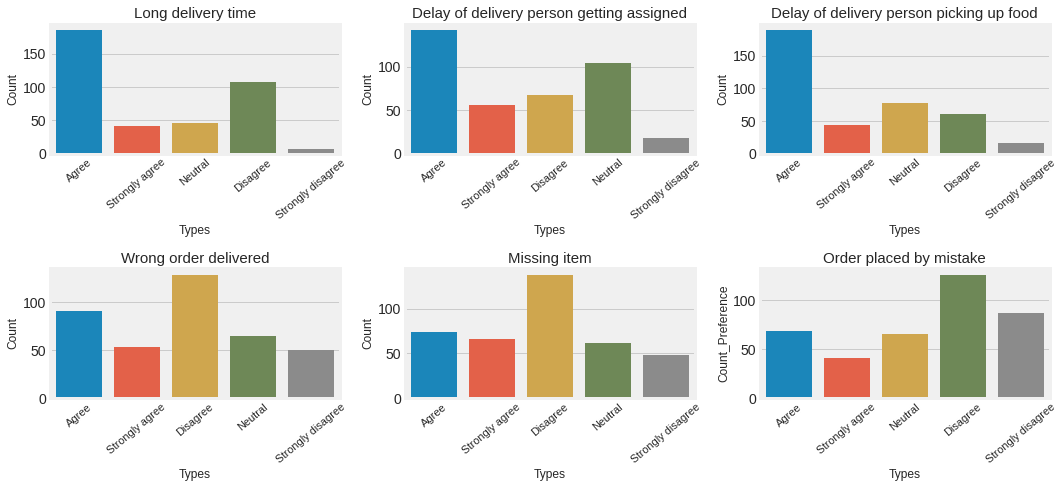

In [18]:
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('fivethirtyeight')


#Long delivery time Countplot
plt.subplot(2,3,1)
ax = sns.countplot(x="Long delivery time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Long delivery time',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Delay of delivery person getting assigned Countplot
plt.subplot(2,3,2)
ax = sns.countplot(x="Delay of delivery person getting assigned", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Delay of delivery person getting assigned',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Delay of delivery person picking up food Countplot
plt.subplot(2,3,3)
ax = sns.countplot(x="Delay of delivery person picking up food", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Delay of delivery person picking up food',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Wrong order delivered Countplot
plt.subplot(2,3,4)
ax = sns.countplot(x="Wrong order delivered", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Wrong order delivered',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Missing item Countplot
plt.subplot(2,3,5)
ax = sns.countplot(x="Missing item", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Missing item',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Order placed by mistake Countplot
plt.subplot(2,3,6)
ax = sns.countplot(x="Order placed by mistake", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Order placed by mistake',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count_Preference', fontsize = 12)
plt.tight_layout()


**Insights:**

People feel that long time in the delivery is highly influencing them to cancel their ongoing order. Plus, they also agree that delay in delivery person getting assigned to them and delay in delivery person picking up the food contributes to their decision of cancelling the order. But on the other hand, majority of the respondents don’t cancel their order of they have any missing item or wrong item being delivered as they will know about the issue once the order gets delivered and they can’t cancel at that point.

## Time factors in order demand

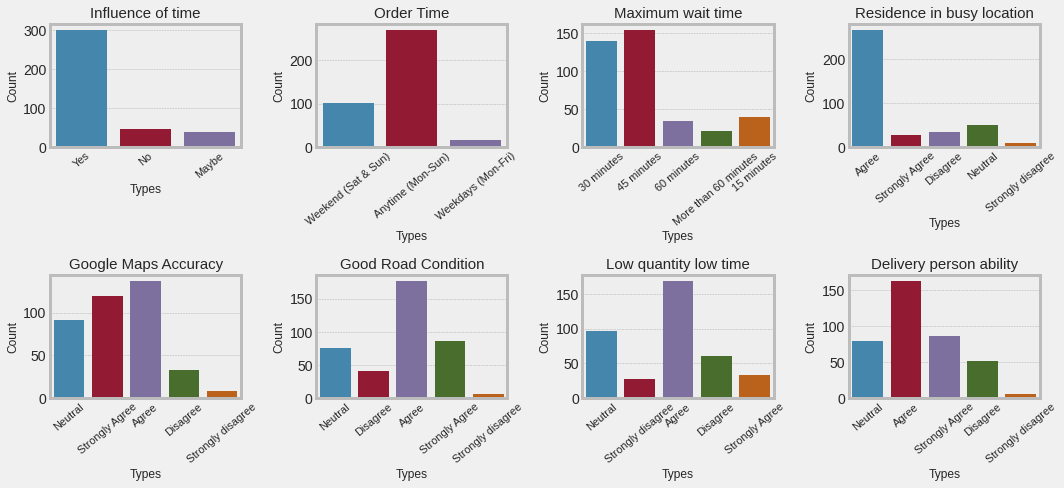

In [19]:
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('bmh')

#Influence of time Countplot
plt.subplot(2,4,1)
ax = sns.countplot(x="Influence of time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Influence of time',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Order Time Countplot
plt.subplot(2,4,2)
ax = sns.countplot(x="Order Time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Order Time',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Maximum wait time Countplot
plt.subplot(2,4,3)
ax = sns.countplot(x="Maximum wait time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Maximum wait time',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Hygiene Countplot
plt.subplot(2,4,4)
ax = sns.countplot(x="Residence in busy location", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Residence in busy location',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Accuracy Countplot
plt.subplot(2,4,5)
ax = sns.countplot(x="Google Maps Accuracy", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Google Maps Accuracy',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Good Road Condition Countplot
plt.subplot(2,4,6)
ax = sns.countplot(x="Good Road Condition", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Road Condition',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Low quantity low time Countplot
plt.subplot(2,4,7)
ax = sns.countplot(x="Low quantity low time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Low quantity low time',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Delivery person ability Countplot
plt.subplot(2,4,8)
ax = sns.countplot(x="Delivery person ability", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Delivery person ability',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

**Insights:**

Majority of respondents votes yes that their order has an influence with respect to the time of entire process. Nearly 269 respondents expressed that they order anytime in week and followed by the next highest on weekends and weekday order. Also, respondents have conveyed that the maximum wait time by majority is 45 minutes followed by 30 and 60-minutes wait time to receive their order.Majority of the people agreed that they reside in a busy location and many strongly agree that their google maps of their location is accurate. Nearly 169 people have the perception that if they order low quantity their order gets delivered faster as the cooking time is minimum. Now many residents in Bangalore feel that they are staying in a location where the road conditions are good. Also, majority think that it is up to the delivery person to figure out the location and delivery the order at the shortest possible time.

## Importance of rating post delivery

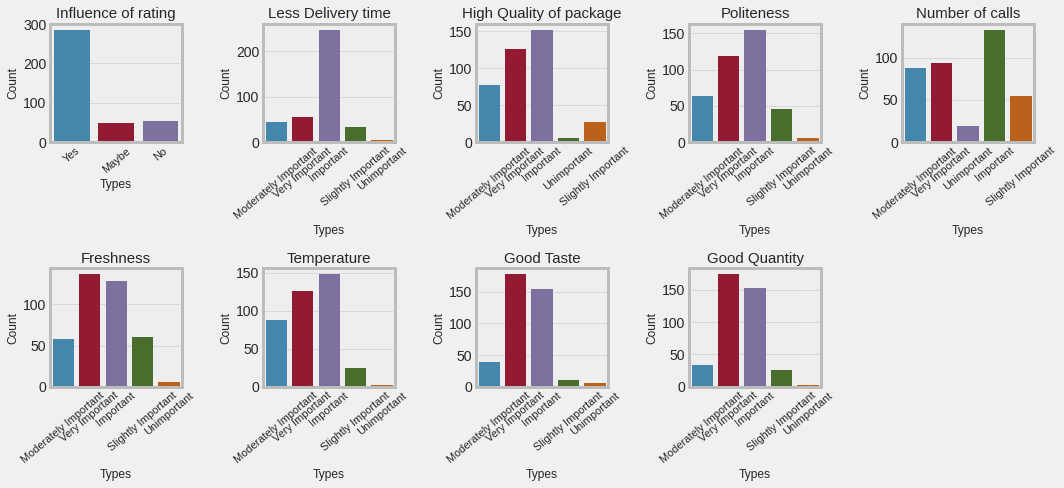

In [20]:
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('bmh')

#Influence of rating Countplot
plt.subplot(2,5,1)
ax = sns.countplot(x="Influence of rating", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Influence of rating',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Less Delivery time Countplot
plt.subplot(2,5,2)
ax = sns.countplot(x="Less Delivery time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Less Delivery time',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#High Quality of package Countplot
plt.subplot(2,5,3)
ax = sns.countplot(x="High Quality of package", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('High Quality of package',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Politeness Countplot
plt.subplot(2,5,4)
ax = sns.countplot(x="Politeness", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Politeness',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Number of calls Countplot
plt.subplot(2,5,5)
ax = sns.countplot(x="Number of calls", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Number of calls',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Freshness Countplot
plt.subplot(2,5,6)
ax = sns.countplot(x="Freshness ", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Freshness',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Temperature Countplot
plt.subplot(2,5,7)
ax = sns.countplot(x="Temperature", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Temperature',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Good Taste Contplot
plt.subplot(2,5,8)
ax = sns.countplot(x="Good Taste ", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Taste',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Good Quantity Countplot
plt.subplot(2,5,9)
ax = sns.countplot(x="Good Quantity", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Quantity',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

**Insights:**

Nearly 286 respondents have agreed ‘Yes’ that Majority of the people consider quality of package as important for the rating of delivery. Also, lesser delivery time is considered to be an important factor while giving rating. When it comes to the delivery person, majority consider number of calls made and politeness are considered important factor by majority of respondent. Usually the delivery person will make more calls if there are any issue and they are less polite if they feel the delivery process is difficult and that in turn reflects their rating.Majority of them are positive and consider all the factors as important for rating the restaurant. Now looking into each picture, we can see that majority of the people are considering freshness as a very important factor when it comes to rating, they also see temperature as an important factor but not that important as customers can understand that food is being delivered at a time span. Many consumers are considering good quantity and good taste as a very important factor there are very few around 9 who feels that they are unimportant.

## Bivariate Analysis

## Bivariate Analysis-1

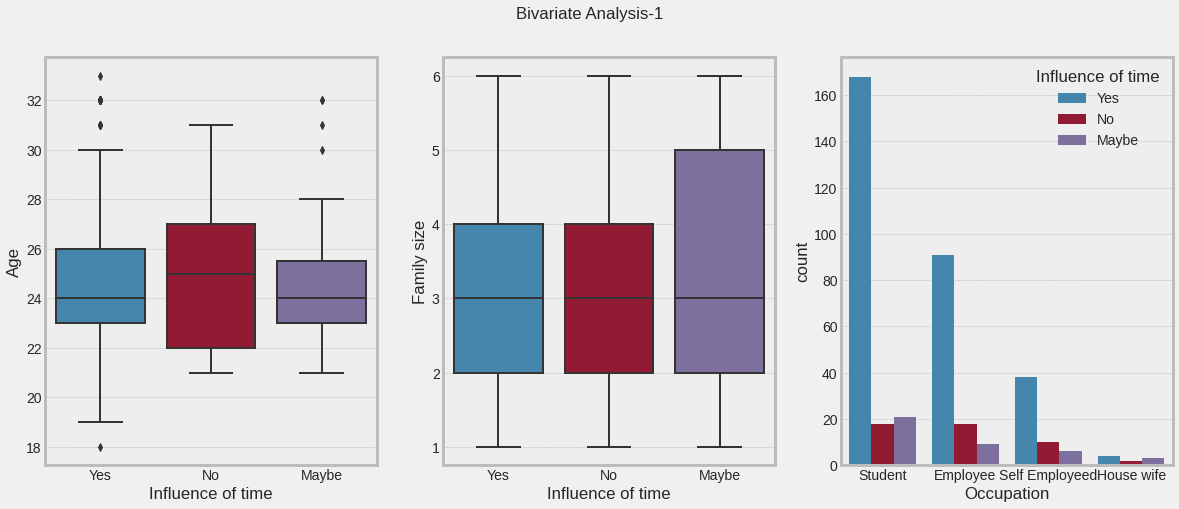

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))


fig.suptitle('Bivariate Analysis-1')

sns.boxplot(ax=axes[0], data=delivery, x='Influence of time', y='Age')
sns.boxplot(ax=axes[1], data=delivery, x='Influence of time', y='Family size')
sns.countplot(ax=axes[2],data=delivery,x="Occupation", hue="Influence of time")

**Insights:**

It can be declared that majority of the age group are influenced by time of delivery. But there are few people from the sample in mid-age participants who doesn’t get influenced much. They are aged between 22-28 years old.Also it can be declared that majority of the family size are influenced by time of delivery. We can notice that when family size increase there are more influence in the time considering there can be aged people in the family. When there is a family size of 2,3 there is chance that time won’t be an influencing factor.We can see that there is a significant influence of time in students and employees when it comes to online delivery. Also, the numbers are lower to homemakers and self-employed. The bars are same at 18 for students and employee who doesn’t get influenced by time of delivery.

## Bivariate Analysis-2
1. Marital status and wait time
2. Income and Influence in rating
3. Road condition and Long time in delivery

[Text(0, 0, 'Neutral'),
 Text(0, 0, 'Disagree'),
 Text(0, 0, 'Agree'),
 Text(0, 0, 'Strongly Agree'),
 Text(0, 0, 'Strongly disagree')]

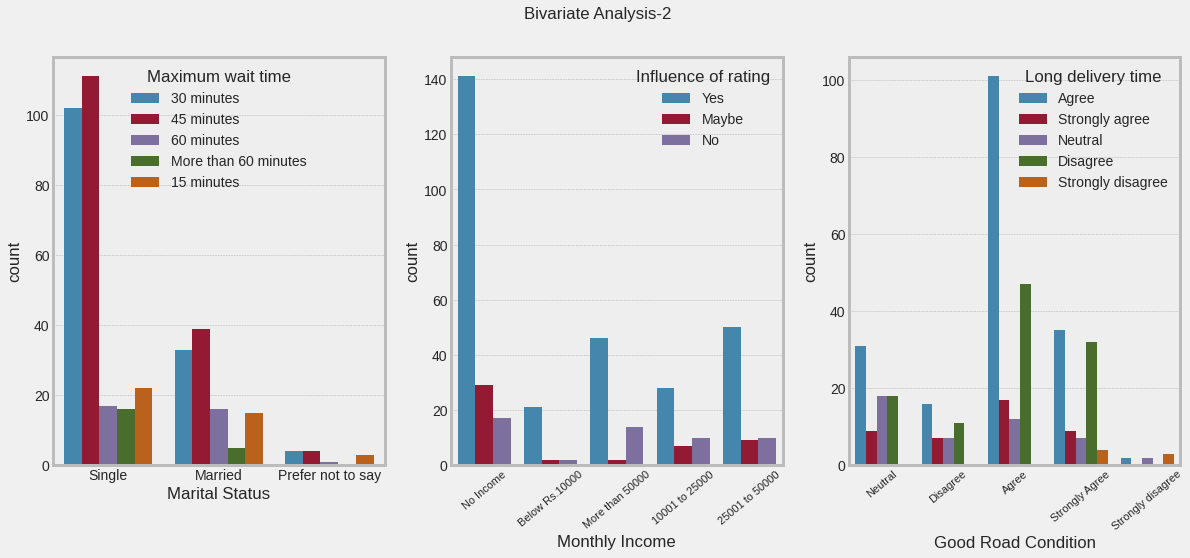

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))


fig.suptitle('Bivariate Analysis-2')

sns.countplot(ax=axes[0],data=delivery,x="Marital Status", hue="Maximum wait time")
ax=sns.countplot(ax=axes[1],data=delivery,x="Monthly Income", hue="Influence of rating")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax=sns.countplot(ax=axes[2],data=delivery,x="Good Road Condition", hue="Long delivery time")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)

**Insights:**

There isn’t a significant difference between the groups with regards to the waiting room. Majority of the married and bachelor respondents said that their waiting time is around 30-45 minutes and there isn’t much difference between the rest except there are more students who can wait more than 60 minutes when compared to the married respondents.Respondents with no income probably under the student category has much influence compared to the other income category. Followed by No income category, the next high influence of rating is in 25001-50000 income level respondents.Sometimes worse road condition can lead to traffic and there by leading to long time in delivery. But from the results it can be seen that respondents who agreed that they have good road conditions have agreed that they have long time in delivery, so we can assume that road condition has no effect on the time in delivery.

## Bivariate Analysis-3
1. Order time and Late delivery
2. Busy location and Long time in delivery
3. Food quality and influence in rating

[Text(0, 0, 'Neutral'),
 Text(0, 0, 'Disagree'),
 Text(0, 0, 'Agree'),
 Text(0, 0, 'Strongly agree'),
 Text(0, 0, 'Strongly disagree')]

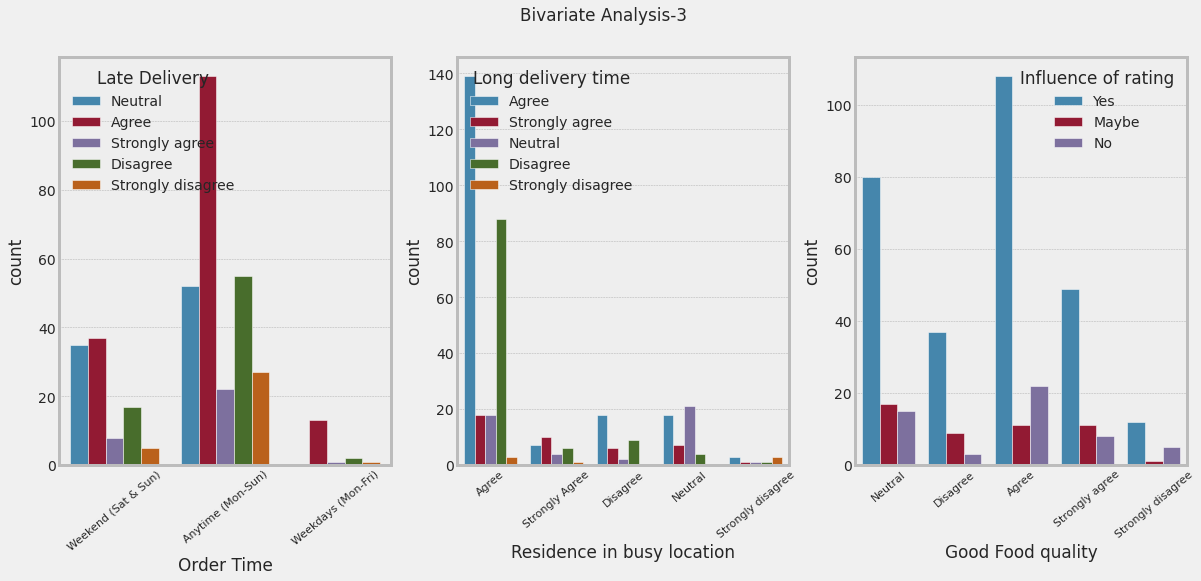

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
sns.set_style("white")

fig.suptitle('Bivariate Analysis-3')

ax=sns.countplot(ax=axes[0],data=delivery,x="Order Time", hue="Late Delivery")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax=sns.countplot(ax=axes[1],data=delivery,x="Residence in busy location", hue="Long delivery time")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax=sns.countplot(ax=axes[2],data=delivery,x="Good Food quality", hue="Influence of rating")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)

**Insights:**

It can be seen that the orders placed on weekend have much majority votes on late delivery when compared to the orders in weekdays. There are very less people who disagree that there isn’t late delivery on weekends.The busier location is, late the delivery can be as from the results plotted by this data. Nearly 157 respondents have agreed that they are from residence in busy location and they are experiencing delay in delivery.Also it can be said from the plot 3 that quality does impact to a certain level as nearly 108 respondents have agreed that the quality of food have influence in their rating followed by 80 respondents who voted neutral for this hypothesis.

## Bivariate Analysis-4
1. Quantity and Influence in rating
2. Food temperature and Influence in rating
3. Taste and Influence in rating

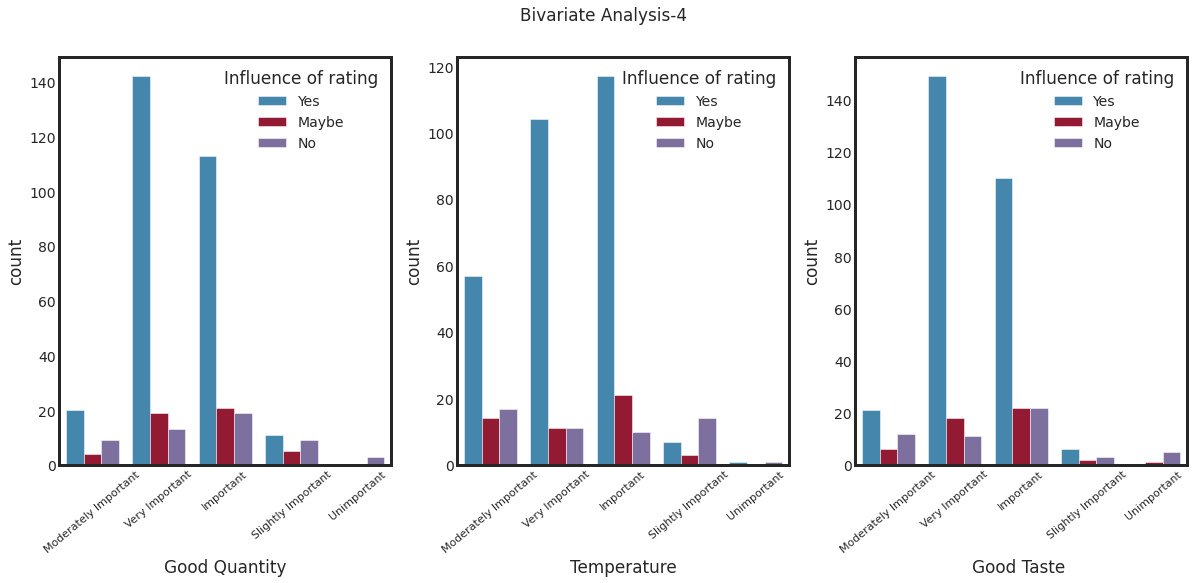

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))


fig.suptitle('Bivariate Analysis-4')

ax=sns.countplot(ax=axes[0],data=delivery,x="Good Quantity", hue="Influence of rating")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax=sns.countplot(ax=axes[1],data=delivery,x="Temperature", hue="Influence of rating")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax=sns.countplot(ax=axes[2],data=delivery,x="Good Taste ", hue="Influence of rating")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)

sns.set_style("dark")

**Insights:**

It can be said from the plot that quantity highly impacts rating as nearly 142 respondents finds it very important followed by 113 respondents who voted important for the food quantity when considering to rate the restaurant.From the plot 2 the temperature is considered important as nearly 117 respondents have voted important followed by 104 respondents who voted very important for the food temperature when considering to rate the restaurant.From the plot 3 taste is considered very important as nearly 149 respondents have voted very important followed by 100 respondents who voted just important for the food taste when considering to rate the restaurant.

## Multivariate Analysis

## Multivariate Analysis-1

In [25]:
#Considering 3 variables
fig = px.bar(delivery, x="Influence of time", y="Good Road Condition", 
             color="Good Road Condition", barmode="group",facet_col="Order Time")

#Setting up the title
fig.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
    paper_bgcolor="LightSteelBlue",
    title_text='Does Road condition and Order time has anything to do with influence in time?'
)
fig.show()

**Insights:**

It can be seen that there is a high influence of time when the road conditions are good and especially during the weekends. There are nearly 45 respondents have agreed that they consider time as an important factor during delivery during weekends with a good road condition.

## Multivariate Analysis-2

In [26]:
#Considering 3 variables
fig = px.bar(delivery, x="Influence of time", y="Number of calls", 
             color="Number of calls", barmode="group",facet_col="Late Delivery")

#Setting up the title
fig.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
    paper_bgcolor="LightSteelBlue",
    title_text='Does Number of calls and Late delivery has anything to do with influence in time?'
)
fig.show()

**Insights:**

It can be seen that there is a lot of influence in time when the people consider number of calls as an important factor and there is a late delivery. Usually delivery person calls the customer to pass on any information and or when the person couldn’t reach the destination which consumes time and the delivery gets delayed.

## Multivariate Analysis -3

In [27]:
#Considering 3 variables
fig = px.bar(delivery, x="Influence of rating", y="High Quality of package", 
             color="High Quality of package", barmode="group",facet_col="Poor Hygiene")

#Setting up the title
fig.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
    paper_bgcolor="LightSteelBlue",
    title_text='Does Packaging and Hygiene has anything to do with influence in rating?'
)
fig.show()

**Insights:**

From the plot, it can be said that Quality of package is very important and hygiene also plays an important role as nearly 80+ respondents has agreed that hygiene plays an important role and in that nearly 69 respondents support quality of package influences the rating of restaurants.

## Multivariate Analysis-4

In [28]:
#Considering 3 variables
fig = px.bar(delivery, x="Influence of rating", y="Good Taste ", 
             color="Good Taste ", barmode="group",facet_col="Temperature")

#Setting up the title
fig.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
    paper_bgcolor="LightSteelBlue",
    title_text='Does Taste and Temperature of food has anything to do with influence in rating?'
)
fig.show()

**Insights:**

From the results, it can be identified that people consider both important as nearly 93 respondents voted very important for rating a restaurant followed by many respondents voting it as an important. There are significantly a smaller number of people who has voted when they have no influence of rating.

## Multivariate Analysis-5

In [29]:
#Considering 3 variables
fig = px.bar(delivery, x="Influence of rating", y="Good Quantity", 
             color="Good Quantity", barmode="group",facet_col="Freshness ")

#Setting up the title
fig.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
    paper_bgcolor="LightSteelBlue",
    title_text='Does Quantity and Freshness of food has anything to do with influence in rating?'
)
fig.show()

**Insights:**

From the plot, it can be identified that people consider both important as nearly 87 respondents voted very important for rating a restaurant followed by many respondents voting it as an important. There are significantly a smaller number of people who has voted when they have no influence of rating.

# Geospatial Analysis

## Geo Pointers

In [30]:
Age_band = delivery[(delivery.Age.isin(range(18,40)))]
# Creating a map
m_2 = folium.Map(location=[12.9716,77.5946], tiles='cartodbpositron', zoom_start=13)

# Adding points to the map
for idx, row in Age_band.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m_2)

# Displaying the map
m_2

**Insights:**

We have considered the Age band of 18-40 to get the maximum pointers for this plot. As you can see I have collected data across all the places inside the Bangalore Urban and also the outskirts of the city which makes the data more reliable for it's findings. Most of the data are concentrated much on the Bangalore Urban(inside the city)

## Clustered Location 

In [31]:
# Creating the map
m_3 = folium.Map(location=[12.9716,77.5946], tiles='cartodbpositron', zoom_start=13)

# Adding points to the map
mc = MarkerCluster()
for idx, row in Age_band.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(Marker([row['latitude'], row['longitude']]))
m_3.add_child(mc)

# Displaying the map
m_3

**Insights:**

Most of the data are concentrated in the heart of city- which includes places like Gandhinagar, Chikkapete,VVPuram,Rajajinagar. The next highest data cluster is recorded in South Bangalore where JP Nagar, Madiwala and Koramangala are located. I have also collected nearly 18 responses from Whitefield which is located in the outskirts of Bangalore.

# Text Analysis
For analysing the text, we have a review column which was an open ended question from the questionnaire where the respondents can pass on any comment about the service they experience through the food delivery startup

## Processing review column
Now we do a little processing by removing the records which has nil in their review

In [32]:
#Creating a copy
delivery_reviews=delivery.copy()

#Removing unecessary reviews- Nil value
delivery_reviews= delivery[~delivery['Reviews'].isin(['NIL','nil','Nil','No','Nil\n'])]

# Considering only two columns
delivery_reviews=delivery_reviews[['Reviews','Output']]

#Viewing the data
delivery_reviews

Reviews Output
2    Many a times payment gateways are an issue, so...    Yes
11   Language barrier is also one major issue. Mosl...    Yes
17          Spillage, bad packaging and missing items     Yes
18   Once my order from kfc got exchanged with some...    Yes
22   I feel Swiggy has a good interface for users a...    Yes
..                                                 ...    ...
375            I had bad quality order delivered twice     No
376  Bad rating doesn't mean that the food tastes b...    Yes
377            Order delivered to my location are late     No
378  My location is pretty well built for food deli...    Yes
386  Language barrier is also one major issue. Mosl...    Yes

[243 rows x 2 columns]

## Cleaning the reviews
Here we create a function which removes punctuation, turn the words into lowercase and remove words with any numbers in it

In [33]:
#Function for cleaning
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

#Applying the function on reviews column
delivery_reviews['Reviews']=delivery_reviews['Reviews'].apply(lambda x:review_cleaning(x))
delivery_reviews.head()

Reviews Output
2   many a times payment gateways are an issue so ...    Yes
11  language barrier is also one major issue moslt...    Yes
17          spillage bad packaging and missing items     Yes
18  once my order from kfc got exchanged with some...    Yes
22  i feel swiggy has a good interface for users a...    Yes

## Removing stop words

Stop words doesn't add much to the analysis, but it is mostly used in a sentence. So we eliminate stop words

In [34]:
#Getting all the stop words
stop= stopwords.words('english')

#Removing the stop words
delivery_reviews['Reviews'] = delivery_reviews['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
delivery_reviews.head()

Reviews Output
2   many times payment gateways issue getting refu...    Yes
11  language barrier also one major issue moslty d...    Yes
17               spillage bad packaging missing items    Yes
18  order kfc got exchanged someone else fault del...    Yes
22  feel swiggy good interface users delivery time...    Yes

## Deriving new variables
Now, let's create polarity, review length and word count

Polarity: We use Textblob for for figuring out the rate of sentiment . It is between [-1,1] where -1 is negative and 1 is positive polarity

Review length: length of the review which includes each letters and spaces

Word length: This measures how many words are there in review

In [35]:
#Creating new variables
delivery_reviews['polarity'] = delivery_reviews['Reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
delivery_reviews['review_len'] = delivery_reviews['Reviews'].astype(str).apply(len)
delivery_reviews['word_count'] = delivery_reviews['Reviews'].apply(lambda x: len(str(x).split()))

#Viewing the new variables
delivery_reviews.head()

Reviews Output  polarity  \
2   many times payment gateways issue getting refu...    Yes  0.500000   
11  language barrier also one major issue moslty d...    Yes  0.218750   
17               spillage bad packaging missing items    Yes -0.450000   
18  order kfc got exchanged someone else fault del...    Yes  0.000000   
22  feel swiggy good interface users delivery time...    Yes  0.266667   

    review_len  word_count  
2           73           9  
11         107          15  
17          36           5  
18          56           9  
22         106          15

### Polarity of reviews
Let's see the distribution of polarity which can give us an idea of how the sentiment are distributed

In [36]:
delivery_reviews['polarity'].iplot(
    kind='hist',
    bins=20,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

**Insights:**
* The distribution is normally distributed 
* It has an almost balanced proportion of positive and negative reviews and most of the them are populated around 0 which expresses neutral sentiment

### Output plot

Here we plot the output from the data, the output defines that the customer will purchase the product again from the food delivery service if the circumstances of their responses stays same and true.

In [37]:
delivery_reviews['Output'].iplot(
    kind='hist',
    xTitle='Output',
    linecolor='black',
    yTitle='count',
    title='Review Output plot')

**Insights:**
* The count of 'Yes' is double the times as 'No'
* Most of the respondents are positive about the service and they have declared they will buy from the same food delivery service

### Length of review 

Now let's see how long the respondents have typed to express their feedback

In [38]:
delivery_reviews['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

**Insights:**
* The length of review has a right skewed distribution
* Most of the reviews are limited around 60 letters
* There are very few reviews which extends around 140 letters

### Word count distribution
The last plot was about the letters including spaces, here we split the sentences into words and calculate the count

In [39]:
delivery_reviews['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

**Insights:**
* The word count also expresses a right skewed distribution
* The word count are highly populated(mode) at 5 and extends upto 10 words
* There were word counts which are nearly around 20.

## N-gram analysis
Welcome to the deep text analysis. Here we will be using ngrams to analyse the text, based on it's sentiment

## Monogram analysis
Here we will plot most frequent one word in reviews based on sentiments

In [40]:
#Filtering data
review_pos = delivery_reviews[delivery_reviews["Output"]=='Yes']
review_neg = delivery_reviews[delivery_reviews["Output"]=='No']

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["Reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["Reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



**Insights:**
* Most of the good reviews are on swiggy,zomato, faster service etc,
* Bas reviews mostly contain food quality,location and late deliveries

## Bigram analysis
Here we will plot most frequent two words in reviews based on sentiments

In [41]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["Reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')


## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["Reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'brown')



# Creating two subplots
fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of Positive reviews", 
                                          "Bigram plots of Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

**Insights:**
* In positive reviews  we can get that Swiggy and Zomato are the most loved food services and people mostly provide 4+ stars for their service
* In negative reviews, it is about the delivery people and bad experiences. Also people have complained about damaged and spilled food.

## Trigram analysis
Here we will plot most frequent three words in reviews based on sentiments

In [42]:
## Get the bar chart from positive reviews ##
for sent in review_pos["Reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')


## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["Reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'red')




# Creating two subplots
fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Tri-gram plots of Positive reviews", 
                                          "Tri-gram plots of Negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig, filename='word-plots')

**Insights:**
* We have some contrary opinions here where people have explained about bad experiences and acknowledged that delivery captains are working hard.
* Damaged and spilled foods are especially been frowned by the customers.

## Wordcloud-Positive reviews
Let's look at the word cloud of positive reviews

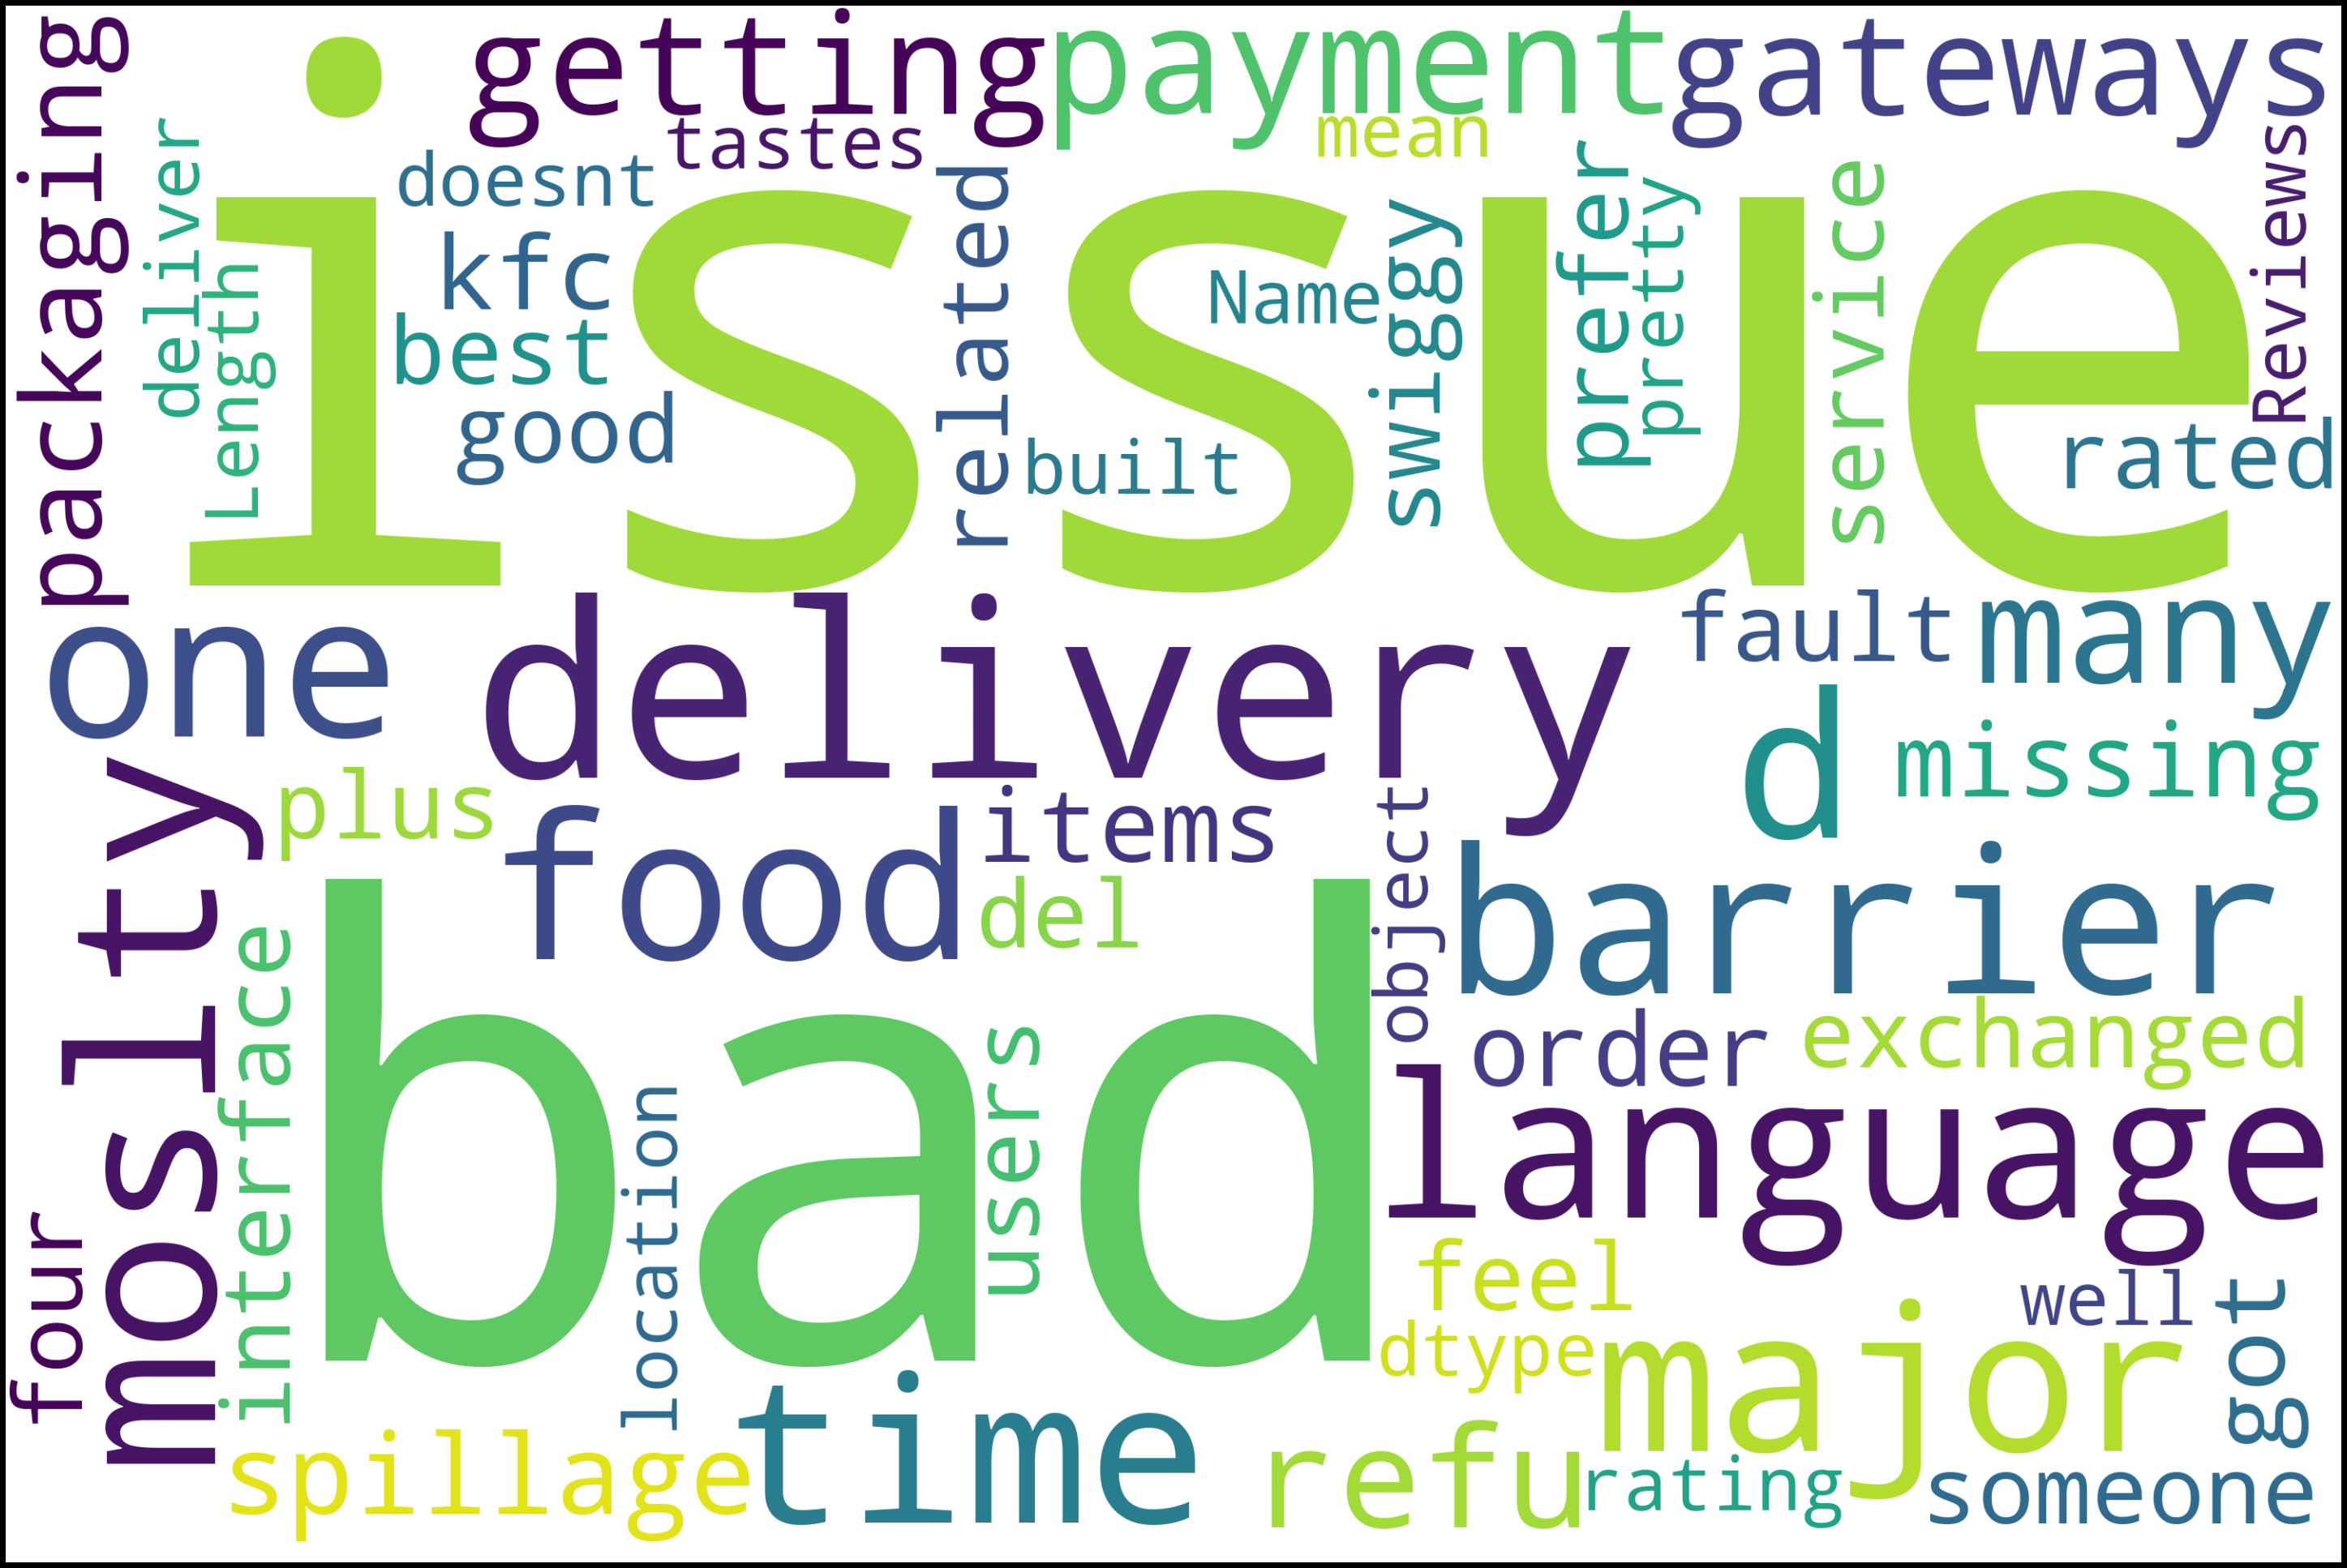

In [43]:
text = review_pos["Reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Insights:**
* This showcases the contrary of what I have expected , there could be words such as not,no associated before them which could have been removed through stopwords

## Wordcloud-Negative reviews
Let's look at the word cloud of Negative reviews

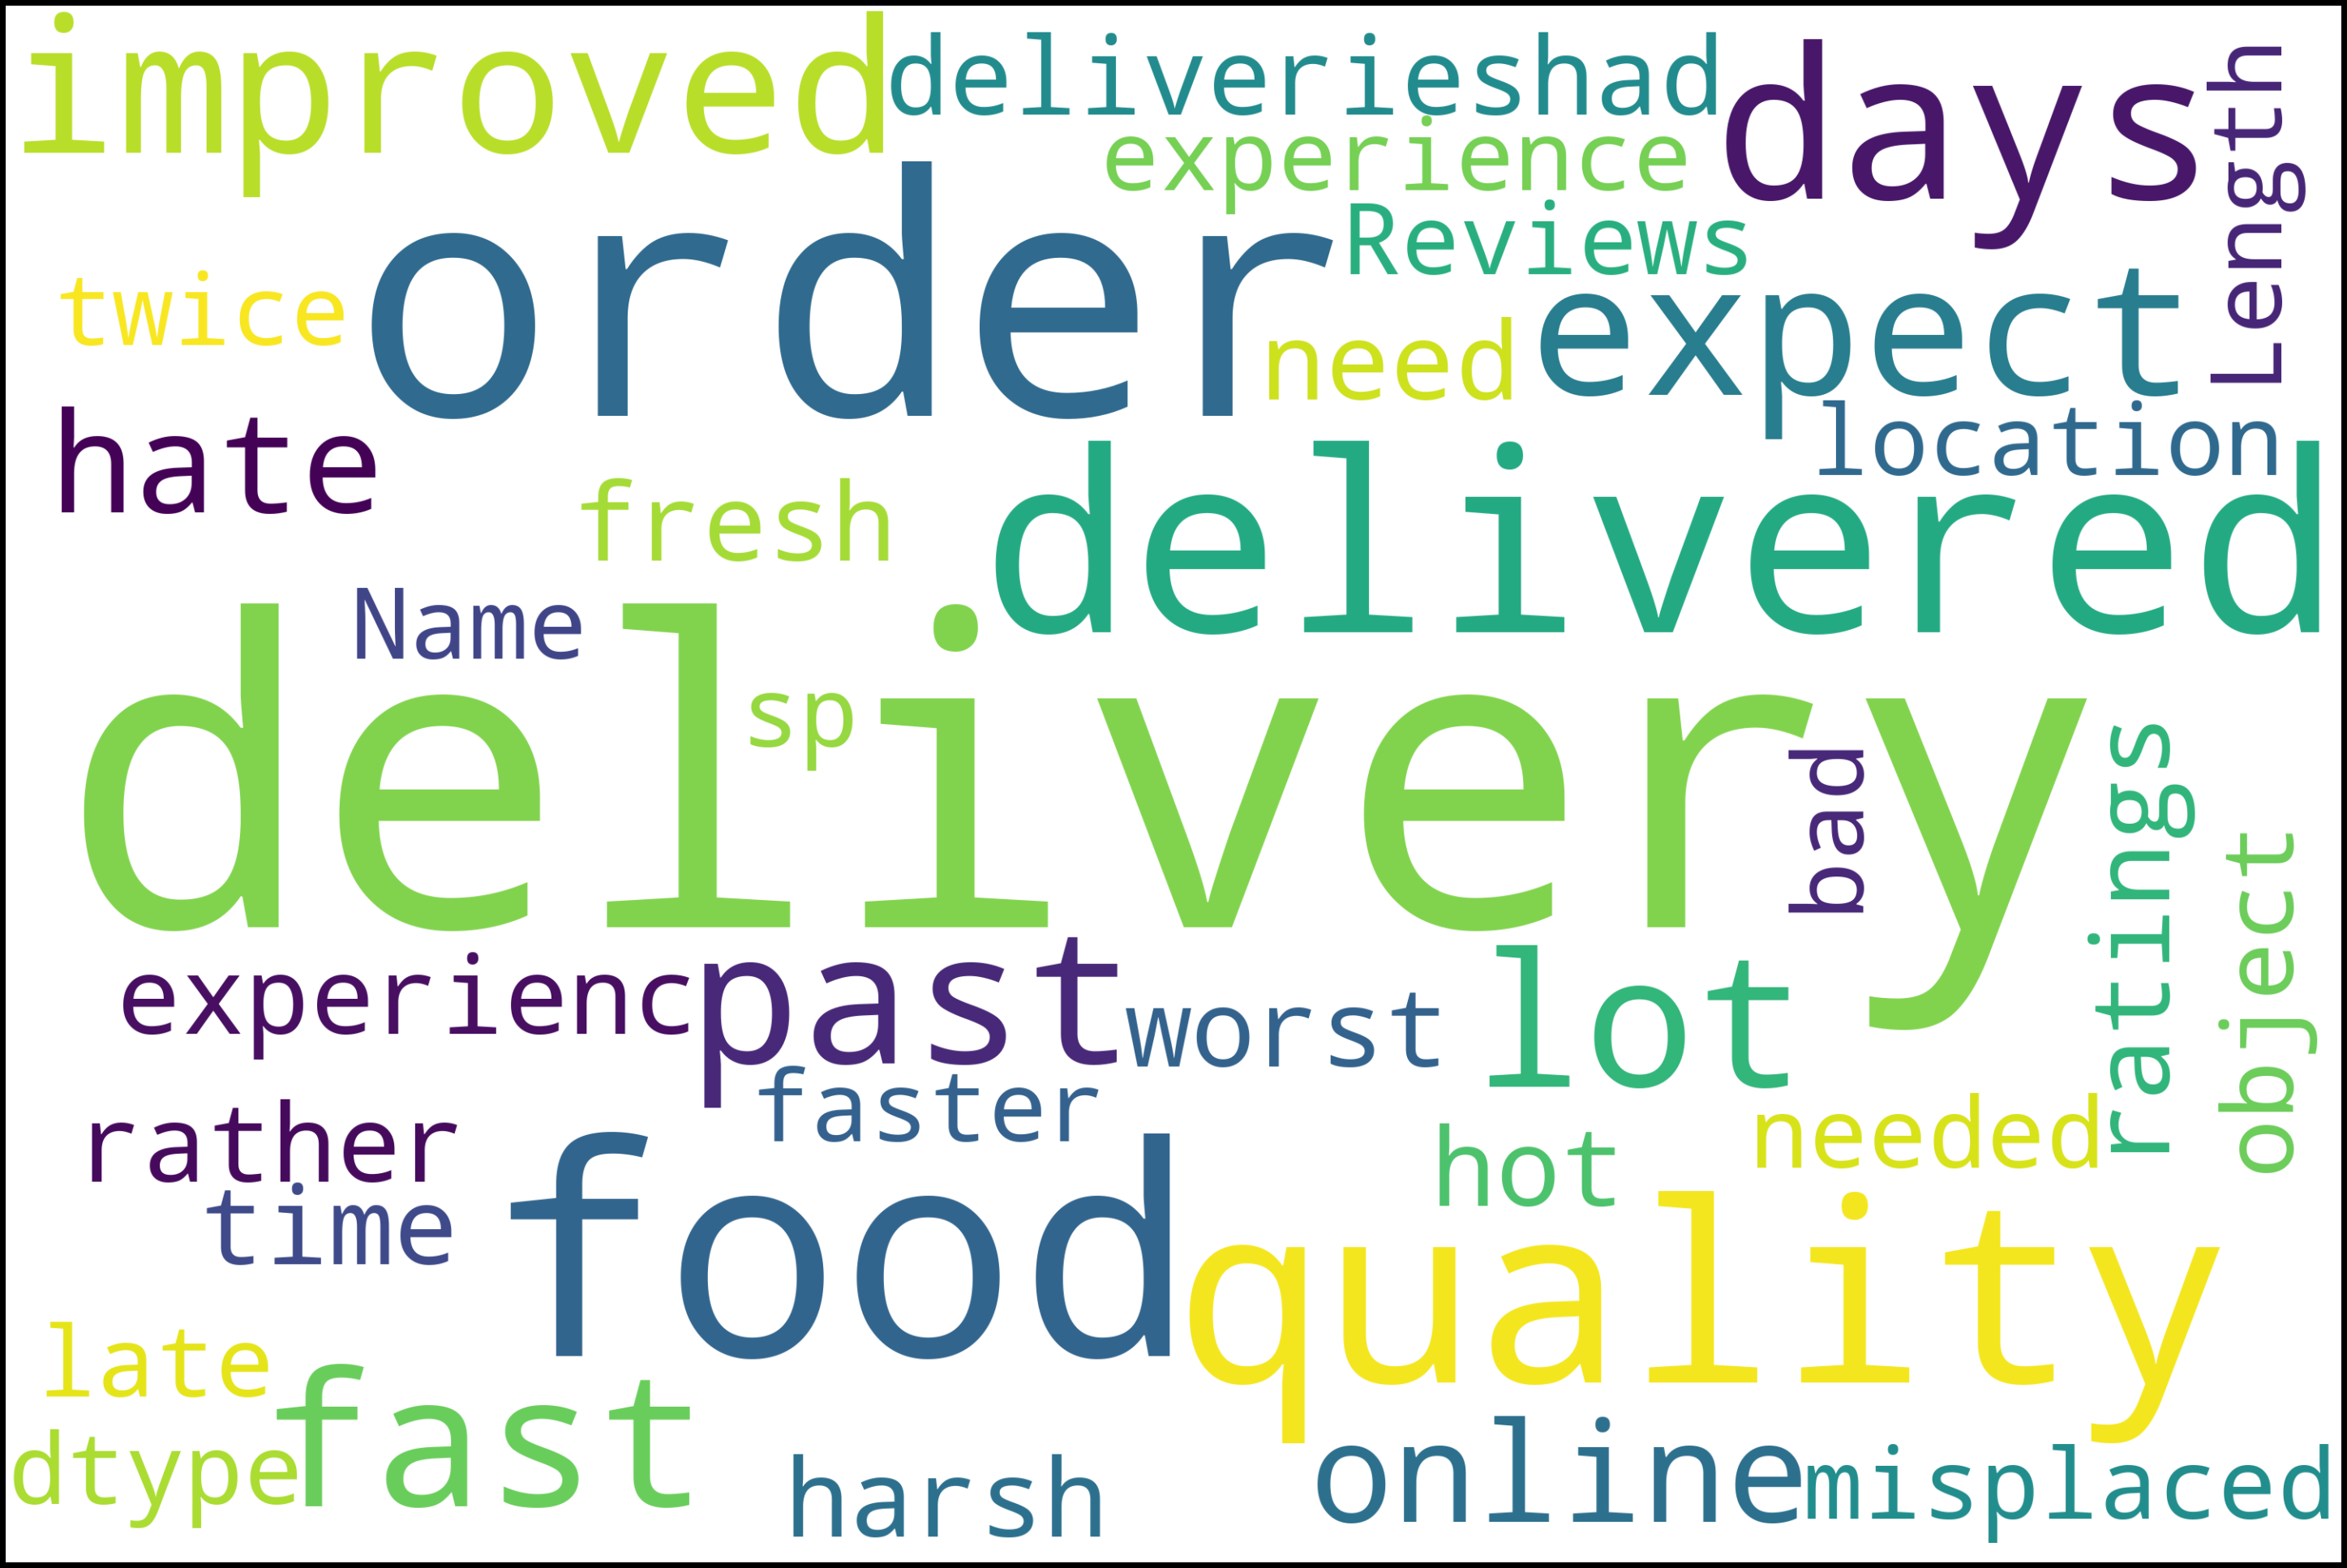

In [44]:
text = review_neg["Reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Insights:**
* We can see words like quality,misplaced, worst for negative reviews

# Conclusion

<img src="https://i.pinimg.com/originals/e5/07/d7/e507d704d4b6fdcb17116762fcd99acd.gif">
All the objectives have been satisfied and we have seen that time of delivery and rating of restaurant plays a major role in customer satisfaction of a food order.Growing companies in this sector like swiggy and zomato are updating their strategies and even provide hygenic food during pandemic and ensures us safety.

This notebook doesn't end here. There will be continuation of model building on predicting potential purchase behavior of customer.

## You can find my [other notebooks here](https://www.kaggle.com/benroshan/notebooks)
